参考资料：

Data Science入门教程 

https://www.kesci.com/home/project/5c1b4b54f8caa6002bc7abe9

In [15]:
data = pd.read_csv('./input/Pokemon.csv')
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### 折线图

In [24]:
from pyecharts import Line

attr = [str(idx) for idx in data.Speed.index]
v1 = data.Speed
v2 = data.Defense

line = Line("速度与防卫示意图")
# **提醒**一下，pyecharts的渲染基于JavaScript，在线上运行的时候需要在```function```中传入```jshost```参数, 

line.add("速度 Speed", attr, v1, mark_point=["average"])
line.add("防卫 Defense", attr, v2, is_smooth=True, mark_line=["max", "average"])
line

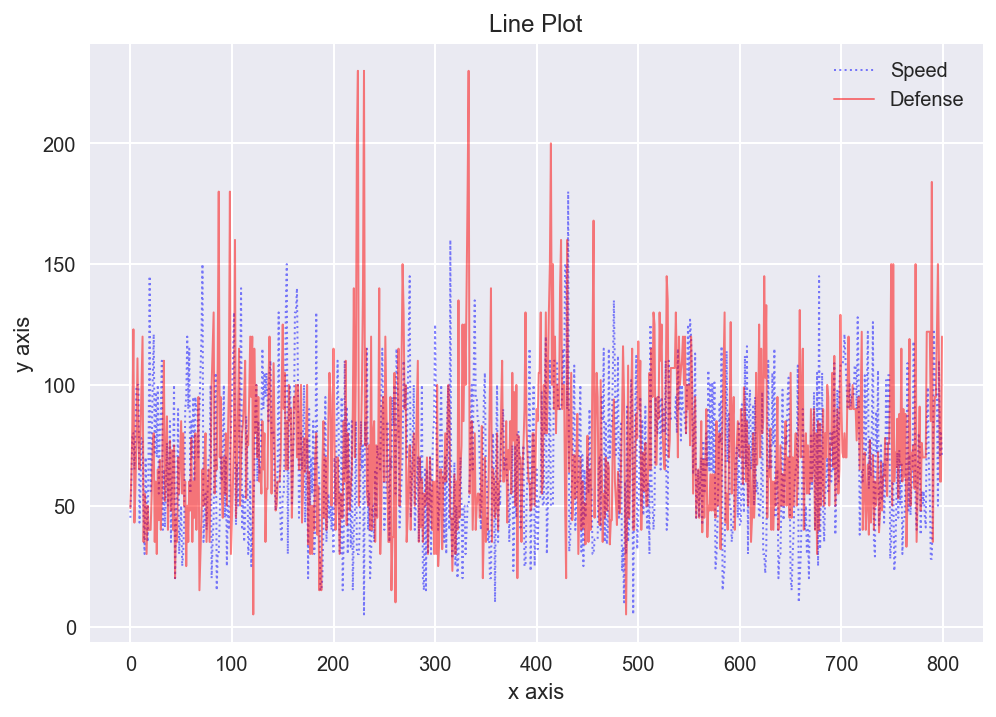

In [26]:
data.Speed.plot(
    kind='line',
    color='blue',
    label='Speed',
    linewidth=1,
    alpha=0.5,
    grid=True,
    linestyle=':')

# Defense 防卫
data.Defense.plot(
    color='red',
    label='Defense',
    linewidth=1,
    alpha=0.5,
    grid=True,
    linestyle='-')
plt.legend(loc='upper right')  # 在图像中显示标签
plt.xlabel('x axis')  # 定义X轴名称
plt.ylabel('y axis')  # 定义y轴名称
plt.title('Line Plot')  # 定义图像名称
plt.show()

### 散点图

In [32]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [34]:
data[['Attack','Defense']]

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43
5,64,58
6,84,78
7,130,111
8,104,78
9,48,65


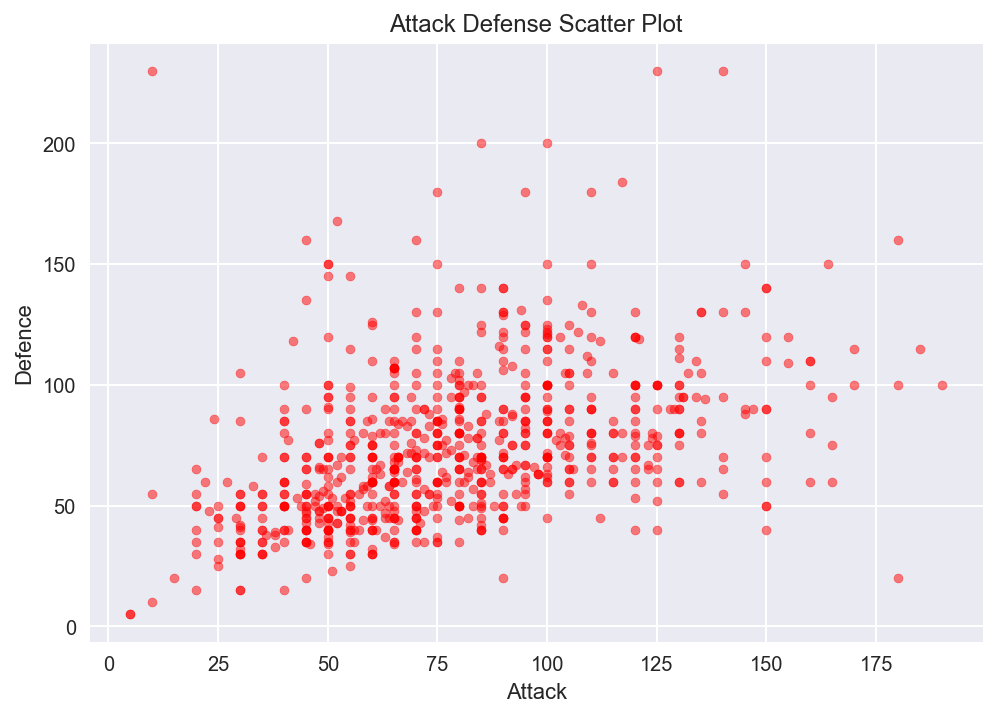

In [27]:
data.plot(kind='scatter', x='Attack', y='Defense',alpha = 0.5,color = 'red')
plt.xlabel('Attack')    # 攻击           
plt.ylabel('Defense') # 防御
plt.title('Attack Defense Scatter Plot')  
plt.show()

In [36]:
from pyecharts import Scatter

v1 = data.Attack
v2 = data.Defense
scatter = Scatter("攻击与防御散点图")
scatter.add("A", v1, v2)
scatter.render()
scatter

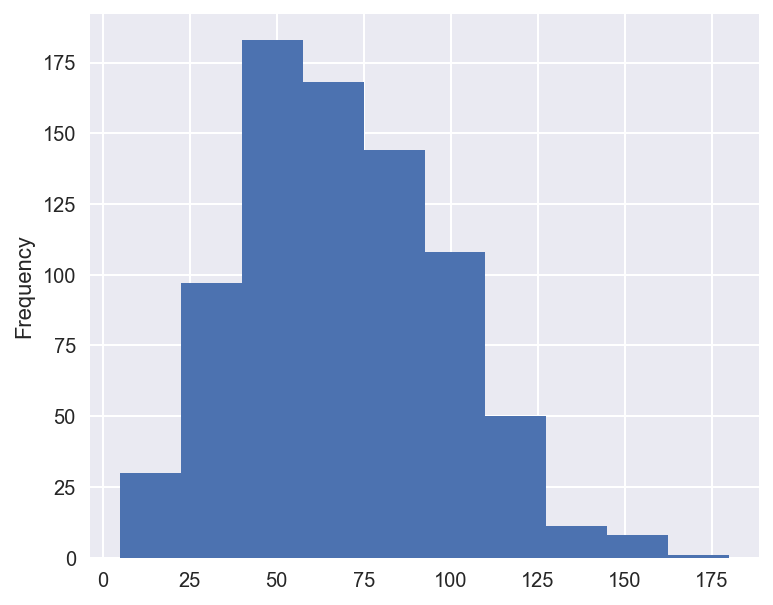

In [37]:
# 直方图
# bins = 直方图中竖条区域的个数，这里我们设置为10个
data.Speed.plot(kind = 'hist',bins = 10,figsize = (6,5))   
plt.show()

In [47]:
hist, bin_edges = np.histogram(data.Speed, bins=10)

In [48]:
max(data.Speed), min(data.Speed)

(180, 5)

In [56]:
hist

array([ 30,  97, 183, 168, 144, 108,  50,  11,   8,   1])

In [50]:
bin_edges

array([  5. ,  22.5,  40. ,  57.5,  75. ,  92.5, 110. , 127.5, 145. ,
       162.5, 180. ])

In [64]:
attr

['5.0-22.5',
 '22.5-40.0',
 '40.0-57.5',
 '57.5-75.0',
 '75.0-92.5',
 '92.5-110.0',
 '110.0-127.5',
 '127.5-145.0',
 '145.0-162.5',
 '162.5-180.0']

In [69]:
from pyecharts import Bar

attr = []

for i in range(1, len(bin_edges)):
    attr.append(str(bin_edges[i - 1]) + '-' + str(bin_edges[i]))

v1 = hist
bar = Bar("直方图示例")

bar.add("", attr, v1, bar_category_gap=10, xaxis_rotate=30, yaxis_rotate=0,is_label_show=True)
bar

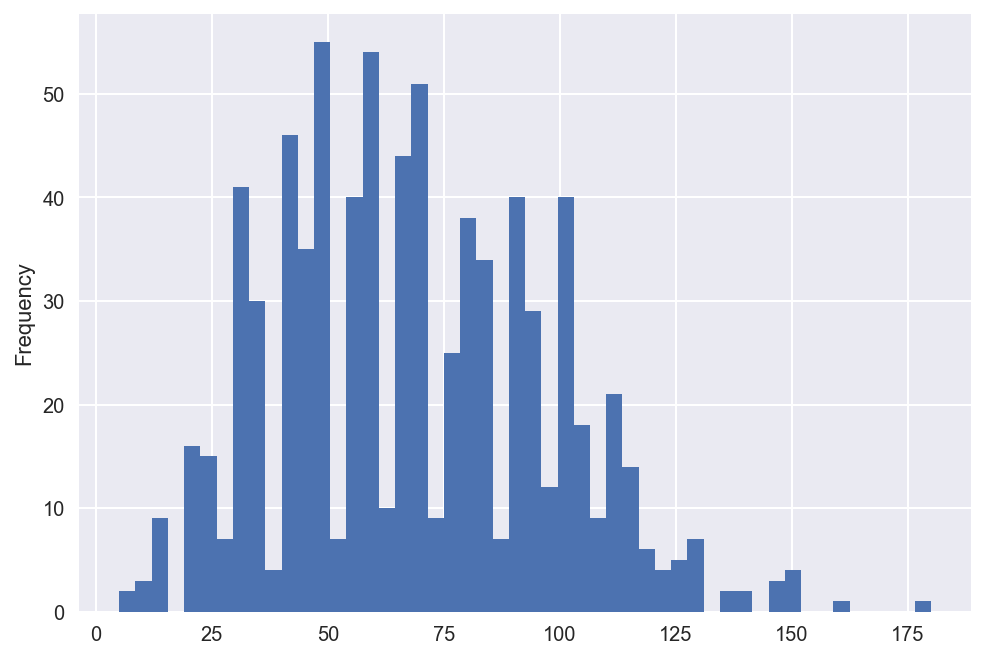

In [71]:
# clf()：清除当前 figure 的所有axes
data.Speed.plot(kind='hist', bins=50)
# plt.clf()
# 由于使用了clf()，我们看不到绘制的图像

In [73]:
# 1 - 过滤数据
x = data['Defense'] > 200  # 我们看到防御值大于 200 的口袋妖怪有 3 只
data[x]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False


In [74]:
# 2 - 使用逻辑运算符‘and’过滤数据
# 可以看到，防御值大于200且攻击值大于100的口袋妖怪仅有2只
data[np.logical_and(data['Defense'] > 200, data['Attack'] > 100)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False


In [75]:
# 同上，这次我们使用 '&' 达到相同的效果
data[(data['Defense']>200) & (data['Attack']>100)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False


In [76]:
# 如果条件(i不等于5)为真，则保持循环；直到条件为假，跳出循环，执行下一行语句
i = 0
while i != 5 :
    print('i is: ',i)
    i +=1 
print(i,' is equal to 5')

i is:  0
i is:  1
i is:  2
i is:  3
i is:  4
5  is equal to 5


In [78]:
# 遍历列表中的索引（index）和值（value）
# index : value = 0:1, 1:2, 2:3, 3:4, 4:5
for index, value in enumerate(lis):
    print(index, " : ", value)
print('')

0  :  1
1  :  2
2  :  3
3  :  4
4  :  5



In [79]:
# 对于字典，我们可以使用for循环遍历字典中的所有键/值对
dictionary = {'spain':'madrid','france':'paris'}
for key,value in dictionary.items():
    print(key," : ",value)
print('')

spain  :  madrid
france  :  paris



In [82]:
# 在 pandas 里，我们可以使用 for 循环显示索引和值
for index, value in data[['Attack']][0:1].iterrows():
    print(index, " : ", value)

0  :  Attack    49
Name: 0, dtype: int64


In [86]:
for index, value in data.iteritems():
    pass
    # print(index, " : ", value)

In [87]:
# 可变参数 *args
def f(*args):
    for i in args:
        print(i)
f(1)
print("")
f(1,2,3,4)

1

1
2
3
4


In [88]:
# 关键字参数 **kwargs 
def f(**kwargs):
    """ print key and value of dictionary"""
    for key, value in kwargs.items():               # 如果不理解这个部分，可以转到for循环部分并查看字典for循环
        print(key, " ", value)
f(country = 'spain', capital = 'madrid', population = 123456)

country   spain
capital   madrid
population   123456


In [89]:
# zip()示例
list1 = [1,2,3,4]
list2 = [5,6,7,8]
z = zip(list1,list2)  # 返回一个对象
print(z)
z_list = list(z)      # list():转换为列表
print(z_list)

[(1, 5), (2, 6), (3, 7), (4, 8)]


In [93]:
# 与 zip 相反，zip(*) 可理解为解压，返回二维矩阵式
un_zip = zip(*z_list)

In [94]:
list(un_zip)

[(1, 2, 3, 4), (5, 6, 7, 8)]

In [95]:
un_zip = zip(*z_list)
un_list1,un_list2 = list(un_zip)     # un_zip 返回一个 tuble
print(un_list1)
print(un_list2)
print(type(un_list2))

(1, 2, 3, 4)
(5, 6, 7, 8)
<class 'tuple'>


In [96]:
# 使用口袋妖怪数据集，进一步练习列表推导式
# 将口袋妖怪按速度分为两类，大于平均速度的值归为high speed，小于平均速度的值归为low speed
threshold = sum(data.Speed)/len(data.Speed)    #threshold=平均速度
data["speed_level"] = ["high" if i > threshold else "low" for i in data.Speed]
data.loc[:8,["Speed","speed_level"]]     

,Speed,speed_level
0,45,low
1,60,low
2,80,high
3,80,high
4,65,low
5,80,high
6,100,high
7,100,high
8,100,high


### EDA：探索性数据分析

In [97]:
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [98]:
# 让我们看看不同类型口袋妖怪出现的频率
print(data['Type 1'].value_counts(dropna=False))  # 此时为降序排列，升序排列使用Ture
# 从下面可以看到，水精灵有112个

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


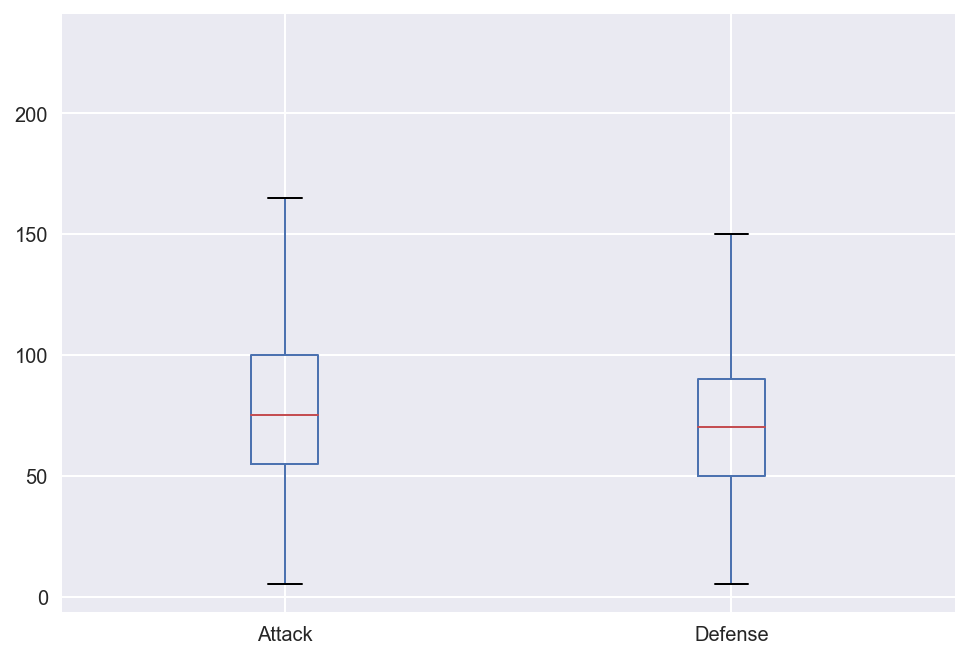

In [99]:
# 动手实践一下
data.boxplot(column=['Attack','Defense'])
plt.show()

In [102]:
# 是否著名
data['Legendary'].head()

0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

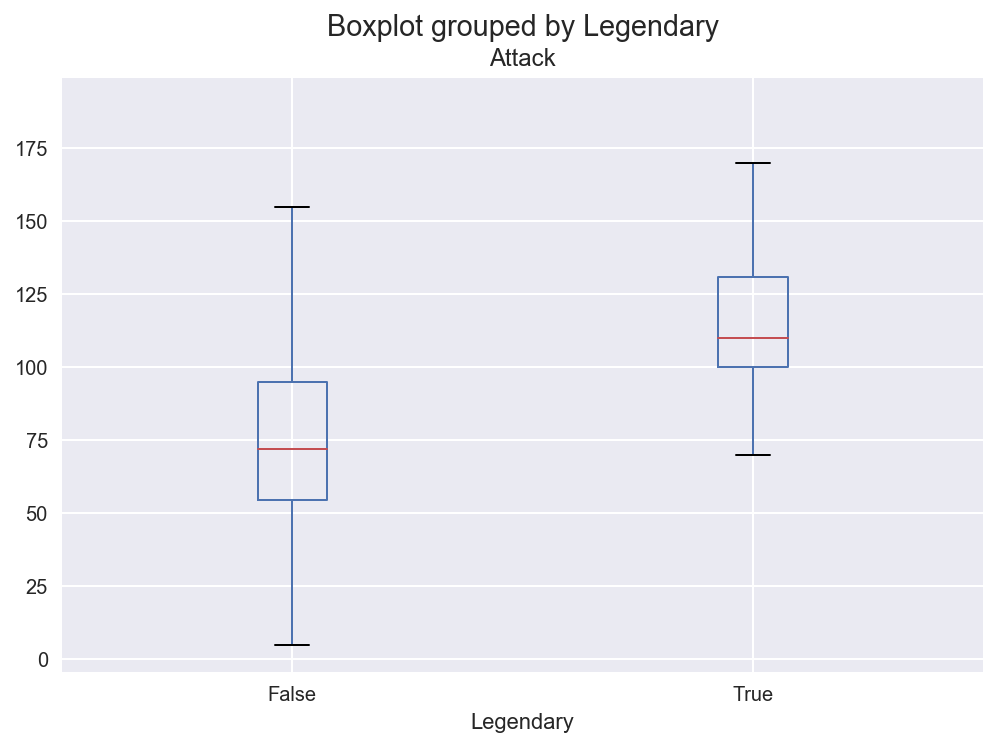

In [100]:
# 加入分类数据列‘Legendary’
data.boxplot(column='Attack', by='Legendary')
plt.show()

In [103]:
# 从 pokemon 数据中创建一组新的数据
data_new = data[10:15]    # 取10-14行共5行数据来构建新数据表
data_new

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False,low
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False,high
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False,high
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False,low
14,11,Metapod,Bug,NaN,205,50,20,55,25,25,30,1,False,low


### melt()

In [105]:
# 使用一下 melt() 函数
# frame：要处理的数据集
# id_vars：不需要被转换的列名
# value_vars ：需要转换的列名
melted = pd.melt(
    frame=data_new, id_vars='Name', value_vars=['Attack', 'Defense', 'Speed'])
melted

,Name,variable,value
0,Wartortle,Attack,63
1,Blastoise,Attack,83
2,BlastoiseMega Blastoise,Attack,103
3,Caterpie,Attack,30
4,Metapod,Attack,20
5,Wartortle,Defense,80
6,Blastoise,Defense,100
7,BlastoiseMega Blastoise,Defense,120
8,Caterpie,Defense,35
9,Metapod,Defense,55


In [107]:
# 我希望能根据上面的'melted'数据表生成一张新表
# 新表可以显示口袋妖怪的名字，及对应的防御值和攻击值

# 设置index为'Name'
# 设置columns为'variable'
# 设置values为value

# 看一看新的数据表是否按照我们的想法显示
melted.pivot(index='Name', columns='variable', values='value')

variable,Attack,Defense,Speed
Name,,,
Blastoise,83,100,78
BlastoiseMega Blastoise,103,120,78
Caterpie,30,35,45
Metapod,20,55,30
Wartortle,63,80,58


In [109]:
# 首先生成两个新的dataframe
data1 = data.head(3)
data1

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,low
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,low
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,high


In [110]:
data2 = data.tail(3)
data2

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,high
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,high
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,high


In [111]:
# 使用comcat()函数将两个表拼接在一起
conc_data_row = pd.concat(
    [data1, data2], axis=0, ignore_index=True)  # axis = 0 : 行拼接，即纵向拼接
conc_data_row

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,low
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,low
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,high
3,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,high
4,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,high
5,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,high


In [112]:
data1 = data['Attack'].head(3)
data2 = data['Defense'].head(3)
conc_data_col = pd.concat([data1, data2], axis=1)  # axis = 1 : 列拼接，即横向拼接
conc_data_col

,Attack,Defense
0,49,49
1,62,63
2,82,83


In [115]:
# 将 str 转换为 categorical（分类数据），将 int 转换为 float 
data['Type 1'] = data['Type 1'].astype('category')
data['Speed'] = data['Speed'].astype('float')

In [114]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45.0,1,False,low
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60.0,1,False,low
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80.0,1,False,high
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80.0,1,False,high
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65.0,1,False,low


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
#              800 non-null int64
Name           800 non-null object
Type 1         800 non-null category
Type 2         414 non-null object
Total          800 non-null int64
HP             800 non-null int64
Attack         800 non-null int64
Defense        800 non-null int64
Sp. Atk        800 non-null int64
Sp. Def        800 non-null int64
Speed          800 non-null float64
Generation     800 non-null int64
Legendary      800 non-null bool
speed_level    800 non-null object
dtypes: bool(1), category(1), float64(1), int64(8), object(3)
memory usage: 77.4+ KB


In [118]:
# 如下所示， Type 1 从类型 object 转换为 categorical
# Speed 对应的数据类型，s 从 int 转换为 float
data.dtypes

#                 int64
Name             object
Type 1         category
Type 2           object
Total             int64
HP                int64
Attack            int64
Defense           int64
Sp. Atk           int64
Sp. Def           int64
Speed           float64
Generation        int64
Legendary          bool
speed_level      object
dtype: object

In [119]:
data['Type 2'].head(6)

0    Poison
1    Poison
2    Poison
3    Poison
4       NaN
5       NaN
Name: Type 2, dtype: object

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
#              800 non-null int64
Name           800 non-null object
Type 1         800 non-null category
Type 2         414 non-null object
Total          800 non-null int64
HP             800 non-null int64
Attack         800 non-null int64
Defense        800 non-null int64
Sp. Atk        800 non-null int64
Sp. Def        800 non-null int64
Speed          800 non-null float64
Generation     800 non-null int64
Legendary      800 non-null bool
speed_level    800 non-null object
dtypes: bool(1), category(1), float64(1), int64(8), object(3)
memory usage: 77.4+ KB


In [122]:
# 单独将 Type2 提出来验证上述想法
data["Type 2"].value_counts(dropna =False)
# 正如我们所预料的，有 38 6个 NaN 值

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Water        14
Ice          14
Ghost        14
Rock         14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [123]:
data.head(6)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45.0,1,False,low
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60.0,1,False,low
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80.0,1,False,high
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80.0,1,False,high
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65.0,1,False,low
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80.0,1,False,high


In [124]:
# 使用 dropna() 删除 NaN 值
data1 = data  # 待会我们将使用数据来填充缺失的值，所以先将它分配给 data1 变量
data1["Type 2"].dropna(inplace=True)
# inplace = True 表示我们不将其赋值给新变量，自动分配填充缺失值
# 可以看到原来的 NaN 值全部被随机填充上 Flying、Dragon 等属性
data1.dropna().head(6)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45.0,1,False,low
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60.0,1,False,low
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80.0,1,False,high
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80.0,1,False,high
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100.0,1,False,high
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100.0,1,False,high


## 使用 Pandas 绘图

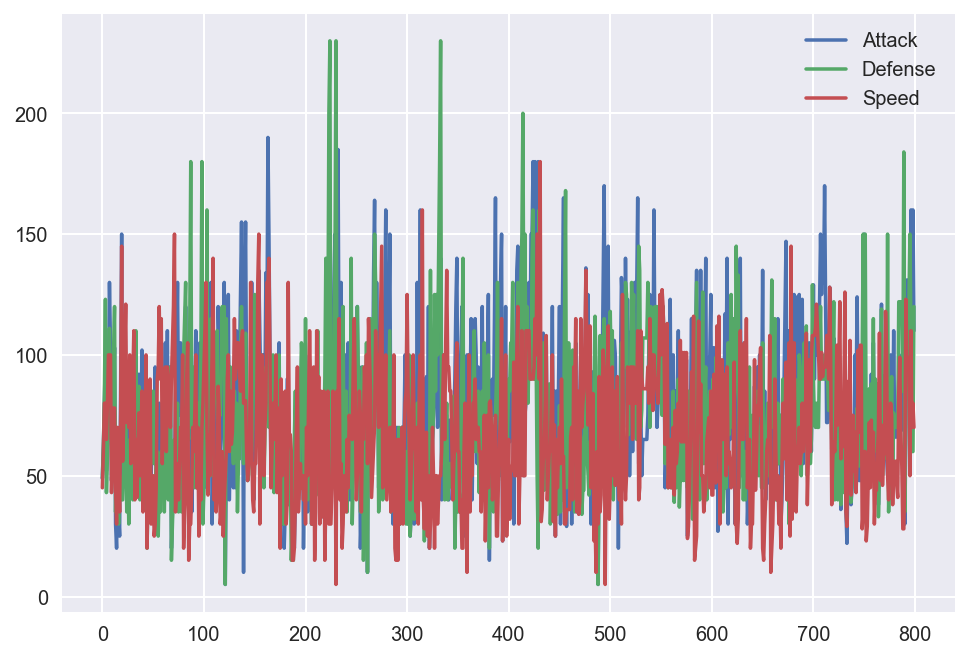

In [143]:
# 绘制所有数据
data1 = data.loc[:,["Attack","Defense","Speed"]]
data1.plot()


### 三个曲线混在一张图里看起来很乱

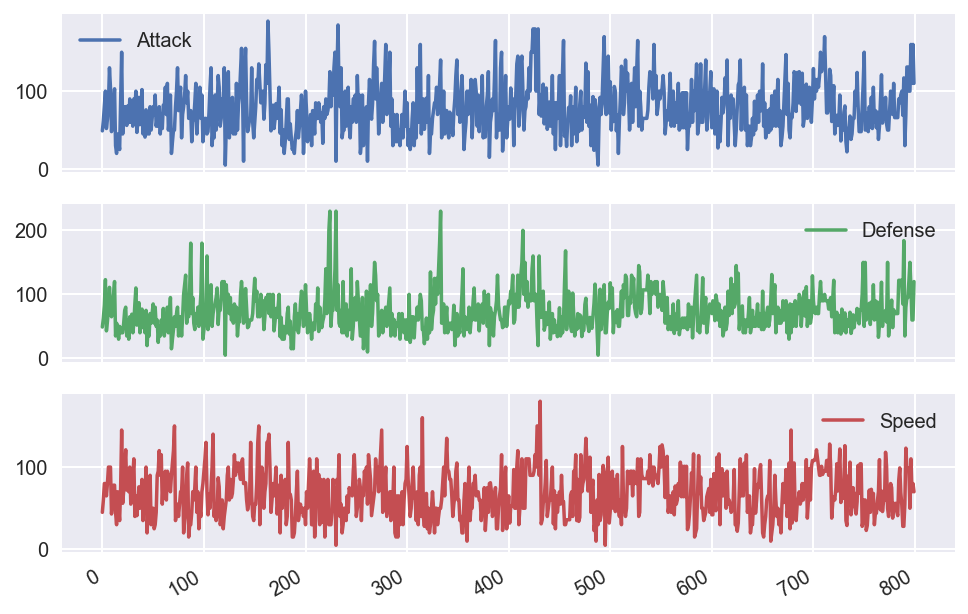

In [144]:
# 分别绘制子图
data1.plot(subplots = True)
plt.show()

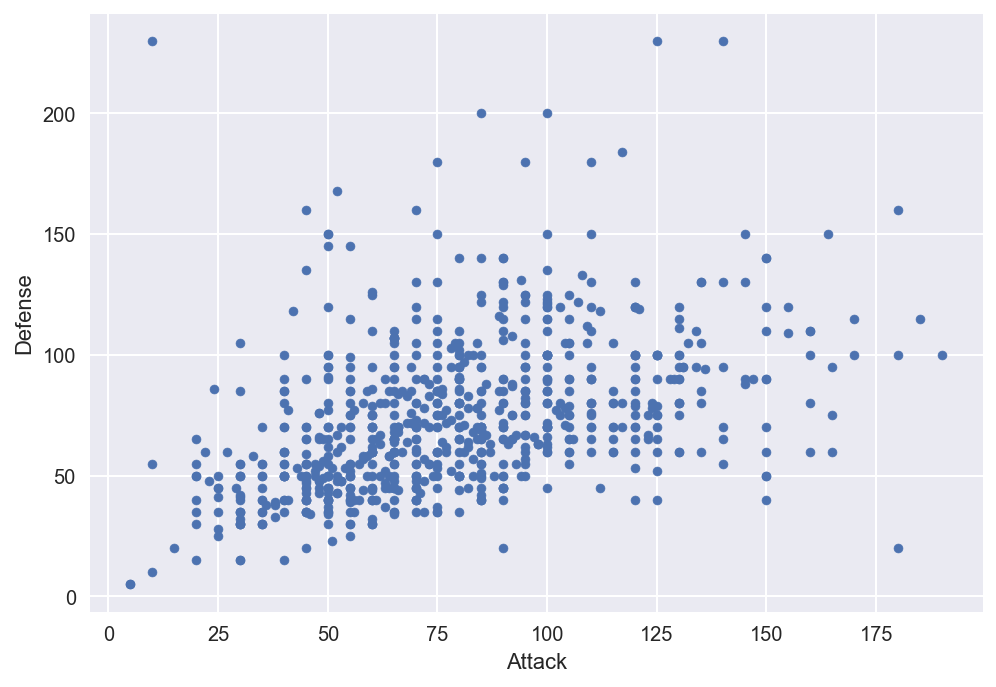

In [145]:
# 绘制散点图
data1.plot(kind="scatter", x="Attack", y="Defense")
plt.show()

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


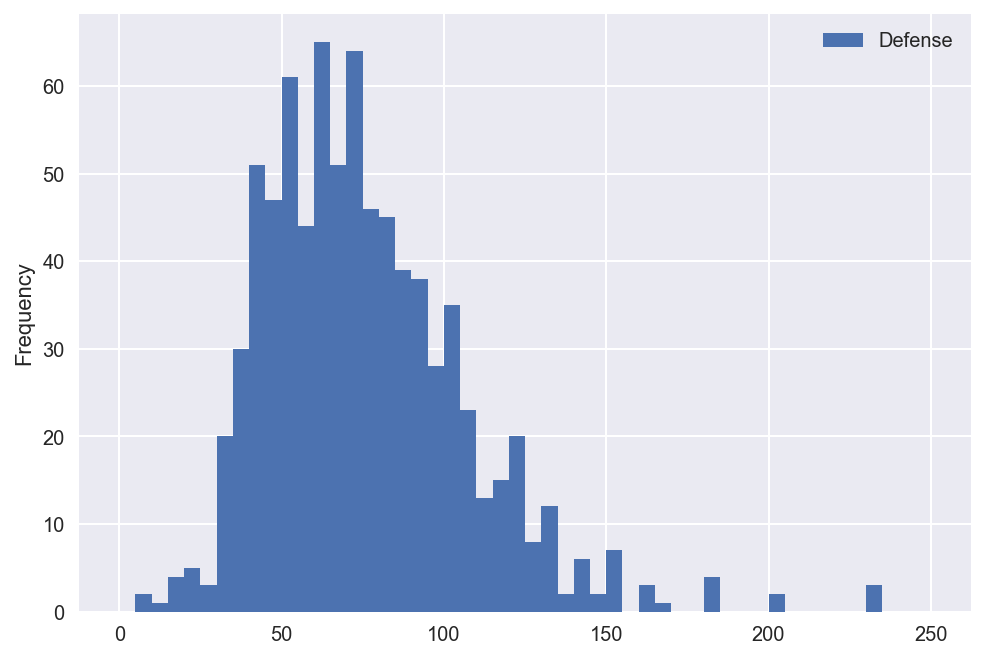

In [146]:
# 直方图
data1.plot(kind="hist", y="Defense", bins=50, range=(0, 250), normed=False)
plt.show()

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


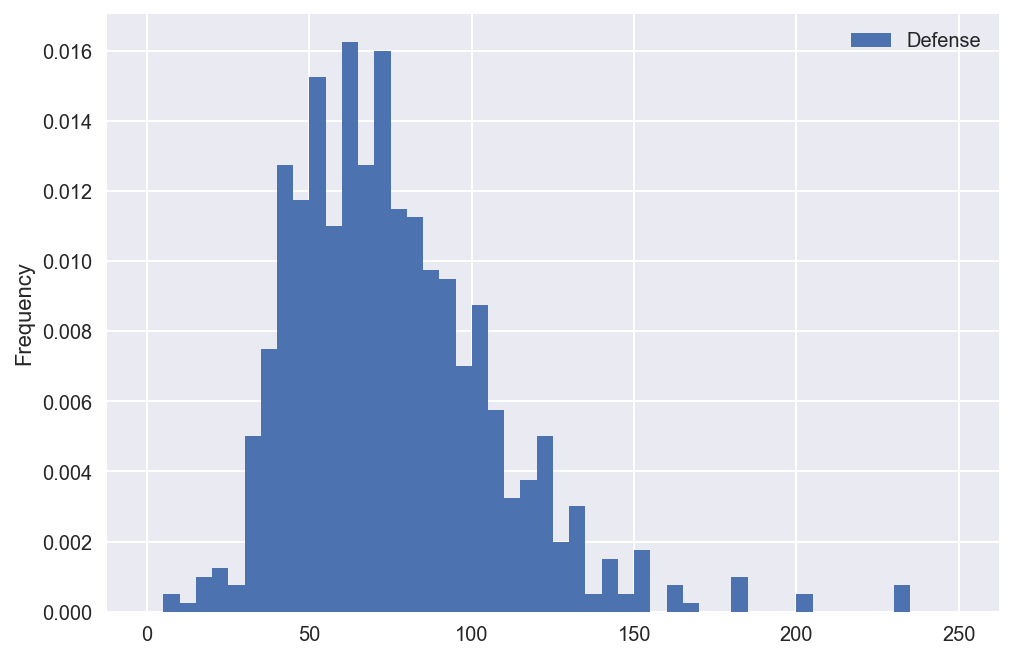

In [147]:
# 将直方图的频数转换成频率
data1.plot(kind="hist", y="Defense", bins=50, range=(0, 250), normed=True)
plt.show()

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


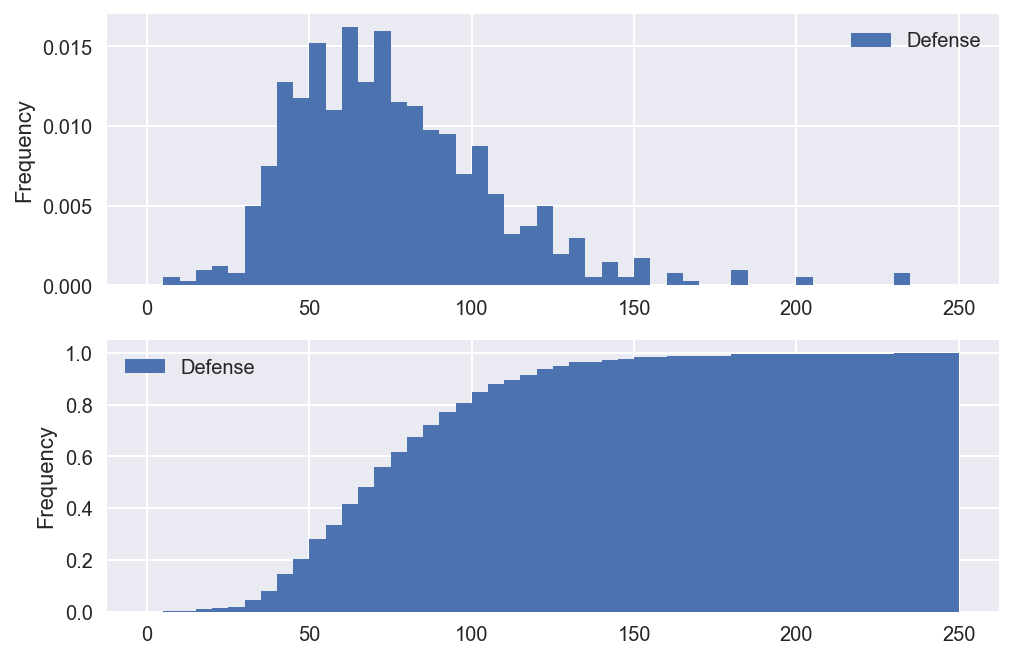

In [148]:
# 统计直方图
fig, axes = plt.subplots(nrows=2, ncols=1)
data1.plot(
    kind="hist", y="Defense", bins=50, range=(0, 250), normed=True, ax=axes[0])
# 累计直方图
data1.plot(
    kind="hist",
    y="Defense",
    bins=50,
    range=(0, 250),
    normed=True,
    ax=axes[1],
    cumulative=True)
plt.savefig('graph.png')
plt.show()

## 时间序列处理

### 重采样：降采样、升采样

In [149]:
time_list = ["1992-03-08", "1992-04-12"]
print(type(time_list[1]))  # 此时日期是str类型
# 我们希望能将它变为datatime类型
datetime_object = pd.to_datetime(time_list)
print(type(datetime_object))

<class 'str'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [150]:
# 调用filterwarnings()关闭警告消息
import warnings
warnings.filterwarnings("ignore")
# 取pokemon数据的前5行进行练习
data2 = data.head()
date_list = [
    "1992-01-10", "1992-02-10", "1992-03-10", "1993-03-15", "1993-03-16"
]
# 转换为datetime类型
datetime_object = pd.to_datetime(date_list)
data2["date"] = datetime_object
# 设置日期作为索引
data2 = data2.set_index("date")
data2

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
date,,,,,,,,,,,,,,
1992-01-10,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45.0,1,False,low
1992-02-10,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60.0,1,False,low
1992-03-10,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80.0,1,False,high
1993-03-15,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80.0,1,False,high
1993-03-16,4,Charmander,Fire,NaN,309,39,52,43,60,50,65.0,1,False,low


In [154]:
# 现在可以根据日期索引筛选数据

In [152]:
data2.loc["1993-03-16"]

#                       4
Name           Charmander
Type 1               Fire
Type 2                NaN
Total                 309
HP                     39
Attack                 52
Defense                43
Sp. Atk                60
Sp. Def                50
Speed                  65
Generation              1
Legendary           False
speed_level           low
Name: 1993-03-16 00:00:00, dtype: object

In [153]:
data2.loc["1992-03-10":"1993-03-16"]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
date,,,,,,,,,,,,,,
1992-03-10,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80.0,1,False,high
1993-03-15,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80.0,1,False,high
1993-03-16,4,Charmander,Fire,NaN,309,39,52,43,60,50,65.0,1,False,low


In [155]:
# 继续使用在前一部分中创建的data，先回顾一下data2长什么样
data2.head(100)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
date,,,,,,,,,,,,,,
1992-01-10,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45.0,1,False,low
1992-02-10,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60.0,1,False,low
1992-03-10,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80.0,1,False,high
1993-03-15,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80.0,1,False,high
1993-03-16,4,Charmander,Fire,NaN,309,39,52,43,60,50,65.0,1,False,low


In [156]:
# 按年进行重采样
data2.resample("Y").mean()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,
1992-12-31,2.0,416.0,61.666667,64.333333,65.0,81.666667,81.666667,61.666667,1.0,False
1993-12-31,3.5,467.0,59.500000,76.000000,83.0,91.000000,85.000000,72.500000,1.0,False


In [157]:
# 按月进行重采样
data2.resample("M").mean()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,
1992-01-31,1.0,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1992-02-29,2.0,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0
1992-03-31,3.0,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
1992-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
# 在真实数据场景中，我们可以使用interplolate()
# 从初值开始插值
data2.resample("M").first().interpolate("linear")

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
date,,,,,,,,,,,,,,
1992-01-31,1.0,Bulbasaur,Grass,Poison,318.000000,45.0,49.0,49.000000,65.000000,65.000000,45.0,1.0,False,low
1992-02-29,2.0,Ivysaur,Grass,Poison,405.000000,60.0,62.0,63.000000,80.000000,80.000000,60.0,1.0,False,low
1992-03-31,3.0,Venusaur,Grass,Poison,525.000000,80.0,82.0,83.000000,100.000000,100.000000,80.0,1.0,False,high
1992-04-30,3.0,NaN,NaN,NaN,533.333333,80.0,83.5,86.333333,101.833333,101.666667,80.0,1.0,NaN,NaN
1992-05-31,3.0,NaN,NaN,NaN,541.666667,80.0,85.0,89.666667,103.666667,103.333333,80.0,1.0,NaN,NaN
1992-06-30,3.0,NaN,NaN,NaN,550.000000,80.0,86.5,93.000000,105.500000,105.000000,80.0,1.0,NaN,NaN
1992-07-31,3.0,NaN,NaN,NaN,558.333333,80.0,88.0,96.333333,107.333333,106.666667,80.0,1.0,NaN,NaN
1992-08-31,3.0,NaN,NaN,NaN,566.666667,80.0,89.5,99.666667,109.166667,108.333333,80.0,1.0,NaN,NaN
1992-09-30,3.0,NaN,NaN,NaN,575.000000,80.0,91.0,103.000000,111.000000,110.000000,80.0,1.0,NaN,NaN


In [159]:
# 我们也可以使用mean()进行插值
data2.resample("M").mean().interpolate("linear")

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,
1992-01-31,1.000000,318.000000,45.000000,49.0,49.0,65.00,65.00,45.000,1.0,0.0
1992-02-29,2.000000,405.000000,60.000000,62.0,63.0,80.00,80.00,60.000,1.0,0.0
1992-03-31,3.000000,525.000000,80.000000,82.0,83.0,100.00,100.00,80.000,1.0,0.0
1992-04-30,3.041667,520.166667,78.291667,81.5,83.0,99.25,98.75,79.375,1.0,0.0
1992-05-31,3.083333,515.333333,76.583333,81.0,83.0,98.50,97.50,78.750,1.0,0.0
1992-06-30,3.125000,510.500000,74.875000,80.5,83.0,97.75,96.25,78.125,1.0,0.0
1992-07-31,3.166667,505.666667,73.166667,80.0,83.0,97.00,95.00,77.500,1.0,0.0
1992-08-31,3.208333,500.833333,71.458333,79.5,83.0,96.25,93.75,76.875,1.0,0.0
1992-09-30,3.250000,496.000000,69.750000,79.0,83.0,95.50,92.50,76.250,1.0,0.0


In [164]:
# 写入数据
data = pd.read_csv('./input/pokemon.csv')
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [165]:
data = data.set_index("#")
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [166]:
# 列选取的差异：series和data frames
print(type(data["HP"]))     # series
print(type(data[["HP"]]))   # data frames

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [167]:
# 用索引切片
data.loc[1:10,"HP":"Defense"]   # 包括第10行和"Denfense"列

,HP,Attack,Defense
#,,,
1,45,49,49
2,60,62,63
3,80,82,83
3,80,100,123
4,39,52,43
5,58,64,58
6,78,84,78
6,78,130,111
6,78,104,78


In [168]:
# 反向切片
data.loc[10:1:-1,"HP":"Defense"] 

,HP,Attack,Defense
#,,,
10,45,30,35
9,79,103,120
9,79,83,100
8,59,63,80
7,44,48,65
6,78,104,78
6,78,130,111
6,78,84,78
5,58,64,58


In [169]:
# 从某一列开始到最后一列
data.loc[1:10,"Speed":] 

,Speed,Generation,Legendary
#,,,
1,45,1,False
2,60,1,False
3,80,1,False
3,80,1,False
4,65,1,False
5,80,1,False
6,100,1,False
6,100,1,False
6,100,1,False


In [170]:
# 创建一个布尔序列
boolean = data.HP > 200
data[boolean]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False


In [171]:
# 多重过滤
first_filter = data.HP > 150
second_filter = data.Speed > 35
data[first_filter & second_filter]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
321,Wailord,Water,NaN,500,170,90,45,90,45,60,3,False
594,Alomomola,Water,NaN,470,165,75,80,40,45,65,5,False


In [172]:
# 基于其他过滤列的过滤
data.HP[data.Speed<15]

#
213     20
328     45
438     50
446    135
597     44
Name: HP, dtype: int64

In [173]:
# 使用普通函数
def div(n):
    return n/2
data.HP.apply(div)

#
1      22.5
2      30.0
3      40.0
3      40.0
4      19.5
5      29.0
6      39.0
6      39.0
6      39.0
7      22.0
8      29.5
9      39.5
9      39.5
10     22.5
11     25.0
12     30.0
13     20.0
14     22.5
15     32.5
15     32.5
16     20.0
17     31.5
18     41.5
18     41.5
19     15.0
20     27.5
21     20.0
22     32.5
23     17.5
24     30.0
       ... 
700    47.5
701    39.0
702    33.5
703    25.0
704    22.5
705    34.0
706    45.0
707    28.5
708    21.5
709    42.5
710    24.5
710    22.0
710    27.0
710    29.5
711    32.5
711    27.5
711    37.5
711    42.5
712    27.5
713    47.5
714    20.0
715    42.5
716    63.0
717    63.0
718    54.0
719    25.0
719    25.0
720    40.0
720    40.0
721    40.0
Name: HP, Length: 800, dtype: float64

In [175]:
# 使用Lambda函数
data.HP.map(lambda n : n/2)

#
1      22.5
2      30.0
3      40.0
3      40.0
4      19.5
5      29.0
6      39.0
6      39.0
6      39.0
7      22.0
8      29.5
9      39.5
9      39.5
10     22.5
11     25.0
12     30.0
13     20.0
14     22.5
15     32.5
15     32.5
16     20.0
17     31.5
18     41.5
18     41.5
19     15.0
20     27.5
21     20.0
22     32.5
23     17.5
24     30.0
       ... 
700    47.5
701    39.0
702    33.5
703    25.0
704    22.5
705    34.0
706    45.0
707    28.5
708    21.5
709    42.5
710    24.5
710    22.0
710    27.0
710    29.5
711    32.5
711    27.5
711    37.5
711    42.5
712    27.5
713    47.5
714    20.0
715    42.5
716    63.0
717    63.0
718    54.0
719    25.0
719    25.0
720    40.0
720    40.0
721    40.0
Name: HP, Length: 800, dtype: float64

In [176]:
# 使用Lambda函数
data.HP.apply(lambda n : n/2)

#
1      22.5
2      30.0
3      40.0
3      40.0
4      19.5
5      29.0
6      39.0
6      39.0
6      39.0
7      22.0
8      29.5
9      39.5
9      39.5
10     22.5
11     25.0
12     30.0
13     20.0
14     22.5
15     32.5
15     32.5
16     20.0
17     31.5
18     41.5
18     41.5
19     15.0
20     27.5
21     20.0
22     32.5
23     17.5
24     30.0
       ... 
700    47.5
701    39.0
702    33.5
703    25.0
704    22.5
705    34.0
706    45.0
707    28.5
708    21.5
709    42.5
710    24.5
710    22.0
710    27.0
710    29.5
711    32.5
711    27.5
711    37.5
711    42.5
712    27.5
713    47.5
714    20.0
715    42.5
716    63.0
717    63.0
718    54.0
719    25.0
719    25.0
720    40.0
720    40.0
721    40.0
Name: HP, Length: 800, dtype: float64

In [177]:
# 使用其他列创建新列
data["total_power"] = data.Attack + data.Defense
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
#,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,98
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,125
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,165
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,223
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,95


In [178]:
# 我们的索引名是：
print(data.index.name)
# 改变一下试试
data.index.name = "index_name"
data.head()

#


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
index_name,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,98
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,125
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,165
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,223
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,95


In [179]:
# 修改索引需要整体修改所有的索引
data.head()
# 首先将数据复制到 data3，然后更改索引
data3 = data.copy()
# 让索引从 100 开始
data3.index = range(100, 900, 1)
data3.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
100,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,98
101,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,125
102,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,165
103,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,223
104,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,95


In [180]:
# 我们可以设置其中一列作为索引.
# data = data.set_index("#")
# 或者 
# data.index = data["#"]

In [181]:
# 重新写入数据
data = pd.read_csv('./input/pokemon.csv')
data.head()
# 可以看到这里有索引，但我们希望将一个或多个列设置为索引

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [182]:
# 设置索引:type 1是外部索引，type 2是内部索引
data1 = data.set_index(["Type 1","Type 2"]) 
data1.head(20)
# data1.loc["Fire","Flying"]   # 如何使用索引

#                       Name  Total  HP  Attack  Defense  \
Type 1 Type 2                                                              
Grass  Poison   1                  Bulbasaur    318  45      49       49   
       Poison   2                    Ivysaur    405  60      62       63   
       Poison   3                   Venusaur    525  80      82       83   
       Poison   3      VenusaurMega Venusaur    625  80     100      123   
Fire   NaN      4                 Charmander    309  39      52       43   
       NaN      5                 Charmeleon    405  58      64       58   
       Flying   6                  Charizard    534  78      84       78   
       Dragon   6  CharizardMega Charizard X    634  78     130      111   
       Flying   6  CharizardMega Charizard Y    634  78     104       78   
Water  NaN      7                   Squirtle    314  44      48       65   
       NaN      8                  Wartortle    405  59      63       80   
       NaN      9                  Blastoise    530  79      83      100   
       NaN      9    BlastoiseMega Blastoise    630  79     103      120   
Bug    NaN     10                   Caterpie    195  45      30       35   
       NaN     11                    Metapod    205  50      20       55   
       Flying  12                 Butterfree    395  60      45       50   
       Poison  13                     Weedle    195  40      35       30   
       Poison  14                     Kakuna    205  45      25       50   
       Poison  15                   Beedrill    395  65      90       40   
       Poison  15      BeedrillMega Beedrill    495  65     150       40   

               Sp. Atk  Sp. Def  Speed  Generation  Legendary  
Type 1 Type 2                                                  
Grass  Poison       65       65     45           1      False  
       Poison       80       80     60           1      False  
       Poison      100      100     80           1      False  
       Poison      122      120     80           1      False  
Fire   NaN          60       50     65           1      False  
       NaN          80       65     80           1      False  
       Flying      109       85    100           1      False  
       Dragon      130       85    100           1      False  
       Flying      159      115    100           1      False  
Water  NaN          50       64     43           1      False  
       NaN          65       80     58           1      False  
       NaN          85      105     78           1      False  
       NaN         135      115     78           1      False  
Bug    NaN          20       20     45           1      False  
       NaN          25       25     30           1      False  
       Flying       90       80     70           1      False  
       Poison       20       20     50           1      False  
       Poison       25       25     35           1      False  
       Poison       45       80     75           1      False  
       Poison       15       80    145           1      False

In [183]:
dic = {"treatment":["A","A","B","B"],"gender":["F","M","F","M"],"response":[10,45,5,9],"age":[15,4,72,65]}
df1 = pd.DataFrame(dic)
df1

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


In [185]:
# 重塑
df1.pivot(index="treatment", columns="gender", values="response")

gender,F,M
treatment,,
A,10,45
B,5,9


In [186]:
# 重塑
df1.pivot(index="treatment", columns="gender", values="age")

gender,F,M
treatment,,
A,15,4
B,72,65


堆叠和非堆叠数据

处理多标签索引

level: 未堆叠索引的位置

swaplevel: 改变内外层索引位置

In [187]:
df2 = df1.set_index(["treatment", "gender"])
df2

response  age
treatment gender               
A         F             10   15
          M             45    4
B         F              5   72
          M              9   65

In [188]:
# level 决定索引
df2.unstack(level=0)

response    age    
treatment        A  B   A   B
gender                       
F               10  5  15  72
M               45  9   4  65

In [189]:
df2.unstack(level=1)

response     age    
gender           F   M   F   M
treatment                     
A               10  45  15   4
B                5   9  72  65

In [191]:
df2

response  age
treatment gender               
A         F             10   15
          M             45    4
B         F              5   72
          M              9   65

In [190]:
# 改变内外层索引位置
df3 = df2.swaplevel(0,1)
df3

,,response,age
gender,treatment,,
F,A,10,15
M,A,45,4
F,B,5,72
M,B,9,65


Smelt()函数

pivot()的逆向变换

In [193]:
df1

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


In [194]:
# df1.pivot(index="treatment",columns = "gender",values="response")
pd.melt(df1, id_vars="treatment", value_vars=["age", "response"])

,treatment,variable,value
0,A,age,15
1,A,age,4
2,B,age,72
3,B,age,65
4,A,response,10
5,A,response,45
6,B,response,5
7,B,response,9
